In [111]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Kaggle dataset, 1915-2023

In [2]:
rotten_tomatoes_kaggle = pd.read_excel('../data/movie_info_kaggle.xlsx')

In [3]:
english_rotten_tomatoes = rotten_tomatoes_kaggle[rotten_tomatoes_kaggle['originalLanguage'] == 'English']

In [4]:
rotten_tomatoes_dropna = english_rotten_tomatoes[(english_rotten_tomatoes['audienceScore'].notna()) & (english_rotten_tomatoes['tomatoMeter'].notna())]

In [5]:
rotten_tomatoes_drop_duplicates = rotten_tomatoes_dropna.drop_duplicates(subset=['id', 'title', 'audienceScore', 'tomatoMeter'], keep='first')

In [6]:
rotten_tomatoes_kaggle_final = rotten_tomatoes_drop_duplicates.drop(['ratingContents', 'originalLanguage', 'writer', 'distributor', 'soundMix'], axis=1)
rotten_tomatoes_kaggle_final = rotten_tomatoes_kaggle_final.rename(columns={'audienceScore': 'audience_score_kaggle', 'tomatoMeter': 'critic_score_kaggle'})
rotten_tomatoes_kaggle_final['critic_score_kaggle'] = rotten_tomatoes_kaggle_final['critic_score_kaggle'].astype(int)
rotten_tomatoes_kaggle_final['audience_score_kaggle'] = rotten_tomatoes_kaggle_final['audience_score_kaggle'].astype(int)
rotten_tomatoes_kaggle_final

,id,title,audience_score_kaggle,critic_score_kaggle,rating,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,director,boxOffice
5,adrift_2018,Adrift,65,69,PG-13,2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",Baltasar KormÃ¡kur,$31.4M
9,1035316-born_to_kill,Born to Kill,74,83,NaN,1947-04-30,2016-05-23,92.0,"Crime, Drama",Robert Wise,NaN
13,leap_of_faith_2019,Leap of Faith: William Friedkin on The Exorcist,86,93,NaN,NaT,2020-11-19,104.0,"Documentary, Mystery & thriller",Alexandre O. Philippe,NaN
20,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61,32,NaN,2011-09-30,2017-03-08,90.0,Documentary,"Nick Broomfield,Joan Churchill",$10.5K
21,1005521-death_of_a_salesman,Death of a Salesman,75,100,NaN,NaT,2016-01-11,135.0,Drama,Volker SchlÃ¶ndorff,NaN
...,...,...,...,...,...,...,...,...,...,...,...
143227,chromophobia,Chromophobia,53,31,NaN,NaT,NaT,136.0,Drama,Martha Fiennes,NaN
143236,comic_book_confidential,Comic Book Confidential,62,75,NaN,NaT,2002-07-23,90.0,Documentary,Ron Mann,NaN
143247,summering,Summering,40,34,PG-13,2022-08-12,NaT,87.0,Drama,James Ponsoldt,$55.9K
143250,fun_size,Fun Size,47,25,PG-13,2012-10-26,2013-02-19,86.0,"Holiday, Comedy",Josh Schwartz,$9.4M


In [7]:
max_theater = rotten_tomatoes_kaggle_final['releaseDateTheaters'].max()
max_streaming = rotten_tomatoes_kaggle_final['releaseDateStreaming'].max()
max_theater, max_streaming

(Timestamp('2023-04-07 00:00:00'), Timestamp('2023-05-09 00:00:00'))

In [8]:
min_theater = rotten_tomatoes_kaggle_final['releaseDateTheaters'].min()
min_streaming = rotten_tomatoes_kaggle_final['releaseDateStreaming'].min()
min_theater, min_streaming

(Timestamp('1915-09-13 00:00:00'), Timestamp('1970-04-26 00:00:00'))

# Reddit dataset, 1970-2024

In [9]:
rotten_tomatoes_reddit = pd.read_excel('../data/movie_info_reddit.xlsx')

In [10]:
rotten_tomatoes_reddit = rotten_tomatoes_reddit.drop(['concat column', 'difference', 'id'], axis=1)

In [11]:
rotten_tomatoes_reddit_dropna = rotten_tomatoes_reddit[(rotten_tomatoes_reddit['audience_score'].notna()) & (rotten_tomatoes_reddit['critic_score'].notna())]

In [12]:
def url_id(link):
    standard_id = link.split('/')[-1]
    return standard_id

In [13]:
rotten_tomatoes_reddit_dropna['id'] = rotten_tomatoes_reddit_dropna['url'].apply(url_id)

C:\Users\amand\AppData\Local\Temp\ipykernel_25532\2867314043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_reddit_dropna['id'] = rotten_tomatoes_reddit_dropna['url'].apply(url_id)


In [14]:
rotten_tomatoes_reddit_drop_duplicates = rotten_tomatoes_reddit_dropna.drop_duplicates(subset=['title', 'critic_score', 'audience_score', 'id'], keep='first')

In [15]:
rotten_tomatoes_reddit_final = rotten_tomatoes_reddit_drop_duplicates.drop(['url'], axis=1) #drop url column
rotten_tomatoes_reddit_final = rotten_tomatoes_reddit_final[['id', 'title', 'release_date', 'critic_score', 'audience_score']] #keep relevant columns
rotten_tomatoes_reddit_final['critic_score'] = rotten_tomatoes_reddit_final['critic_score']*100 #convert from hundredths to hundreds
rotten_tomatoes_reddit_final['audience_score'] = rotten_tomatoes_reddit_final['audience_score']*100 #convert from hundredths to hundreds
rotten_tomatoes_reddit_final['critic_score'] = rotten_tomatoes_reddit_final['critic_score'].astype(int) #change to integer and convert to whole numbers
rotten_tomatoes_reddit_final['audience_score'] = rotten_tomatoes_reddit_final['audience_score'].astype(int) #change to integer and convert to whole numbers
rotten_tomatoes_reddit_final['release_date'] = rotten_tomatoes_reddit_final['release_date'].astype(str) #change type to string in order to edit string 
rotten_tomatoes_reddit_final['release_date_clean'] = rotten_tomatoes_reddit_final['release_date'].str.replace('Released', '') #removed 'Released' from column
rotten_tomatoes_reddit_final = rotten_tomatoes_reddit_final.drop(['release_date'], axis=1) #dropped old release_date column
rotten_tomatoes_reddit_final

,id,title,critic_score,audience_score,release_date_clean
0,love_story,Love Story,63,75,"Dec 16, 1970"
1,airport,Airport,75,54,"Apr 5, 1970"
2,aristocats,The Aristocats,64,70,"Dec 24, 1970"
3,little_big_man,Little Big Man,91,87,"Dec 14, 1970"
4,ryans_daughter,Ryan's Daughter,47,73,"Nov 9, 1970"
...,...,...,...,...,...
11600,divine_madness,Divine Madness,100,90,1980
11601,freuds_last_session,Freud's Last Session,45,72,Jan 19
11602,thin_blue_line,The Thin Blue Line,100,90,"Aug 25, 1988"
11603,i_was_born_but,"I Was Born, But ...",100,90,1932


# Webscrape dataset, streaming in 2025

In [16]:
rotten_tomatoes_webscrape_critic_splat = pd.read_excel('../data/critic_splat.xlsx')
rotten_tomatoes_webscrape_audience_splat = pd.read_excel('../data/audience_splat.xlsx')

In [17]:
movie_links_critic_splat_list = ['/m/a_working_man', '/m/where_the_crawdads_sing', '/m/it_ends_with_us', '/m/aladdin', '/m/i_still_believe', '/m/the_super_mario_bros_movie', '/m/uncharted_2022', '/m/sound_of_freedom', '/m/godzilla_x_kong_the_new_empire', '/m/midway_2019', '/m/transformers_rise_of_the_beasts', '/m/the_unbreakable_boy', '/m/clifford_the_big_red_dog', '/m/red_one', '/m/harold_and_the_purple_crayon', '/m/nefarious_2023', '/m/maleficent_mistress_of_evil', '/m/redeeming_love', '/m/the_boys_in_the_boat', '/m/the_art_of_racing_in_the_rain', '/m/reagan_2024', '/m/champions_2022', '/m/bob_marley_one_love', '/m/am_i_racist', '/m/angel_has_fallen', '/m/someone_like_you_2024', '/m/the_girl_who_believes_in_miracles', '/m/whitney_houston_i_wanna_dance_with_somebody', '/m/jesus_revolution', '/m/21_bridges', '/m/black_and_blue_2019', '/m/spirit_untamed', '/m/shaft_2019', '/m/overcomer', '/m/here_today_2021', '/m/no_safe_spaces', '/m/todos_caen']

In [18]:
movie_links_audience_splat_list = ['/m/the_new_boy', '/m/babygirl_2024', '/m/presence_2024', '/m/the_damned_2024_2', '/m/the_monkey', '/m/star_wars_the_last_jedi', '/m/carry_on', '/m/cuckoo_2024', '/m/arcadian', '/m/leave_the_world_behind_2023', '/m/captain_marvel', '/m/bring_them_down', '/m/emilia_perez', '/m/in_a_violent_nature', '/m/get_away', '/m/things_will_be_different', '/m/war_of_the_worlds', '/m/caveat_2021', '/m/uncut_gems', '/m/mulan_2020', '/m/the_lodge', '/m/ad_astra', '/m/1922_2017', '/m/the_lost_daughter', '/m/no_one_will_save_you', '/m/v_h_s_beyond', '/m/coming_home_in_the_dark', '/m/it_comes_at_night', '/m/high_life_2019', '/m/the_green_knight', '/m/rumours', '/m/the_lost_city_of_z', '/m/infinity_pool_2023', '/m/under_the_skin_2013', '/m/tuesday_2023', '/m/sausage_party', '/m/fair_play_2023', '/m/no_sudden_move', '/m/the_night_eats_the_world', '/m/shadow_in_the_cloud', '/m/cam', '/m/indiana_jones_and_the_kingdom_of_the_crystal_skull', '/m/alone_2020_2', '/m/i_care_a_lot', '/m/blair_witch_project', '/m/disappearance_at_clifton_hill', '/m/king_kong', '/m/1208173-splice', '/m/spy_kids', '/m/stopmotion', '/m/orion_and_the_dark', '/m/apostle_2018', '/m/im_thinking_of_ending_things', '/m/charlie_and_the_chocolate_factory', '/m/eileen', '/m/maestro_2023', '/m/between_the_temples', '/m/we_are_what_we_are_2013', '/m/the_little_hours', '/m/da_5_bloods', '/m/tale_of_tales', '/m/porno_2020', '/m/the_perfection', '/m/beowulf', '/m/backcountry', '/m/colossal', '/m/don_jon', '/m/relic', '/m/the_two_faces_of_january', '/m/piranha_3d', '/m/space_cowboys', '/m/personal_shopper', '/m/the_bfg_2016', '/m/everything_must_go', '/m/land_of_the_dead', '/m/spencer_2021', '/m/1057637-jungle_book', '/m/something_in_the_dirt', '/m/while_were_young', '/m/true_things']

In [19]:
#make id column - audience_splat
id_audience_splat_list = [link.replace('/m/','') for link in movie_links_audience_splat_list]
rotten_tomatoes_webscrape_audience_splat['id'] = id_audience_splat_list

In [20]:
#make id column - critic_splat
id_critic_splat_list = [link.replace('/m/','') for link in movie_links_critic_splat_list]
rotten_tomatoes_webscrape_critic_splat['id'] = id_critic_splat_list

In [21]:
rt_critic_splat = rotten_tomatoes_webscrape_critic_splat.drop(['Unnamed: 0', 'No. Critic Reviews', 'No. Audience Reviews'], axis=1) #drop url column
rt_critic_splat['Release Date'] = rt_critic_splat['Release Date'].astype(str) #change type to string in order to edit string 
rt_critic_splat['Release Date'] = rt_critic_splat['Release Date'].str.replace('Released', '')
rt_critic_splat['Critic Score'] = rt_critic_splat['Critic Score'].str.replace('%', '')
rt_critic_splat['Critic Score'] = pd.to_numeric(rt_critic_splat['Critic Score'], errors='coerce')
rt_critic_splat['Critic Score'] = rt_critic_splat['Critic Score'].astype(int)
rt_critic_splat['Audience Score'] = rt_critic_splat['Audience Score'].str.replace('%', '')
rt_critic_splat['Audience Score'] = pd.to_numeric(rt_critic_splat['Audience Score'], errors='coerce')
rt_critic_splat['Audience Score'] = rt_critic_splat['Audience Score'].astype(int)

In [22]:
def time_to_minutes(time_str):
    parts = time_str.split('h')
    hours = int(parts[0]) if parts[0] else 0
    minutes = int(parts[1].replace('m', '')) if len(parts) > 1 and parts[1].replace('m', '') else 0
    total_minutes = hours * 60 + minutes
    return total_minutes

In [23]:
rt_critic_splat['Move Length'] = rt_critic_splat['Move Length'].apply(time_to_minutes)

In [24]:
rt_critic_splat = rt_critic_splat.rename(columns={'Movie': 'Title', 'Critic Score': 'critic_score_2025', 'Audience Score': 'audience_score_2025', 'Move Length': 'runtime_minutes'})
rt_critic_splat = rt_critic_splat[['id', 'Title', 'critic_score_2025', 'audience_score_2025', 'Genre', 'Rating', 'Release Date', 'runtime_minutes']]

In [25]:
rt_audience_splat = rotten_tomatoes_webscrape_audience_splat.drop(['Unnamed: 0', 'No. Critic Reviews', 'No. Audience Reviews'], axis=1) #drop url column
rt_audience_splat['Release Date'] = rt_audience_splat['Release Date'].astype(str) #change type to string in order to edit string 
rt_audience_splat['Release Date'] = rt_audience_splat['Release Date'].str.replace('Released', '')
rt_audience_splat['Critic Score'] = rt_audience_splat['Critic Score'].str.replace('%', '')
rt_audience_splat['Critic Score'] = pd.to_numeric(rt_audience_splat['Critic Score'], errors='coerce')
rt_audience_splat['Critic Score'] = rt_audience_splat['Critic Score'].astype(int)
rt_audience_splat['Audience Score'] = rt_audience_splat['Audience Score'].str.replace('%', '')
rt_audience_splat['Audience Score'] = pd.to_numeric(rt_audience_splat['Audience Score'], errors='coerce')
rt_audience_splat['Audience Score'] = rt_audience_splat['Audience Score'].astype(int)

In [26]:
rt_audience_splat['Move Length'] = rt_audience_splat['Move Length'].apply(time_to_minutes)

In [27]:
rt_audience_splat = rt_audience_splat.rename(columns={'Movie': 'Title', 'Critic Score': 'critic_score_2025', 'Audience Score': 'audience_score_2025', 'Move Length': 'runtime_minutes'})
rt_audience_splat = rt_audience_splat[['id', 'Title', 'critic_score_2025', 'audience_score_2025', 'Genre', 'Rating', 'Release Date', 'runtime_minutes']]

In [28]:
rt_splat_master = pd.concat([rt_audience_splat, rt_critic_splat])

In [29]:
rt_splat_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 36
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   117 non-null    object
 1   Title                117 non-null    object
 2   critic_score_2025    117 non-null    int32 
 3   audience_score_2025  117 non-null    int32 
 4   Genre                117 non-null    object
 5   Rating               117 non-null    object
 6   Release Date         117 non-null    object
 7   runtime_minutes      117 non-null    int64 
dtypes: int32(2), int64(1), object(5)
memory usage: 7.3+ KB


# Merge, clean and create Final Rotten Tomatoes dataset

In [30]:
#make id columns the same data type
rotten_tomatoes_kaggle_final['id'] = rotten_tomatoes_kaggle_final['id'].astype(str)
rotten_tomatoes_reddit_final['id']  = rotten_tomatoes_reddit_final['id'].astype(str)
rt_splat_master['id'] = rt_splat_master['id'].astype(str)

In [31]:
#merge two Rotten Tomatoes dataframes
rotten_tomatoes_partial = pd.merge(rotten_tomatoes_kaggle_final, rotten_tomatoes_reddit_final, on='id', how='outer')
rotten_tomatoes = pd.merge(rotten_tomatoes_partial, rt_splat_master, on='id', how='outer')

In [32]:
#combine titles
rotten_tomatoes['title_x'] = rotten_tomatoes['title_x'].fillna(rotten_tomatoes['title_y'])
rotten_tomatoes = rotten_tomatoes.drop(['title_y'], axis=1)
rotten_tomatoes['title_x'] = rotten_tomatoes['title_x'].fillna(rotten_tomatoes['Title'])
rotten_tomatoes = rotten_tomatoes.drop(['Title'], axis=1)

In [33]:
#combine genres
rotten_tomatoes['genre'] = rotten_tomatoes['genre'].fillna(rotten_tomatoes['Genre'])
rotten_tomatoes = rotten_tomatoes.drop(['Genre'], axis=1)

In [34]:
#combine runtimes
rotten_tomatoes['runtimeMinutes'] = rotten_tomatoes['runtimeMinutes'].fillna(rotten_tomatoes['runtime_minutes'])
rotten_tomatoes = rotten_tomatoes.drop(['runtime_minutes'], axis=1)

In [35]:
#combine ratings
rotten_tomatoes['rating'] = rotten_tomatoes['rating'].fillna(rotten_tomatoes['Rating'])
rotten_tomatoes = rotten_tomatoes.drop(['Rating'], axis=1)

In [36]:
rotten_tomatoes = rotten_tomatoes.rename(columns={'title_x': 'title', 'audience_score_kaggle': 'audience_score_2023', 'critic_score_kaggle': 'critic_score_2023', 'critic_score': 'critic_score_2024', 'audience_score': 'audience_score_2024'})
rotten_tomatoes = rotten_tomatoes[['id', 'title', 'critic_score_2023', 'critic_score_2024', 'critic_score_2025', 'audience_score_2023', 'audience_score_2024', 'audience_score_2025', 'runtimeMinutes', 'rating', 'genre', 'director', 'boxOffice', 'releaseDateTheaters', 'releaseDateStreaming', 'release_date_clean', 'Release Date']]

In [37]:
rotten_tomatoes_export = 'rotten_tomatoes_export.xlsx'

In [38]:
rotten_tomatoes.to_excel(rotten_tomatoes_export)

In [39]:
rotten_tomatoes_import = pd.read_excel('../data/rotten_tomatoes_import.xlsx')

In [40]:
rotten_tomatoes_final = rotten_tomatoes_import.drop(['Unnamed: 0', 'Unnamed: 20'], axis=1)
rotten_tomatoes_final['critic_score'] = rotten_tomatoes_final['critic_score'].fillna(rotten_tomatoes_final['critic_score_2024'])
rotten_tomatoes_final['critic_score'] = rotten_tomatoes_final['critic_score'].fillna(rotten_tomatoes_final['critic_score_2023'])
rotten_tomatoes_final['audience_score'] = rotten_tomatoes_final['audience_score'].fillna(rotten_tomatoes_final['audience_score_2024'])
rotten_tomatoes_final['audience_score'] = rotten_tomatoes_final['audience_score'].fillna(rotten_tomatoes_final['audience_score_2023'])
rotten_tomatoes_final['releaseDateTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].fillna(rotten_tomatoes_final['Release_Date'])
rotten_tomatoes_final['releaseDateTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].fillna(rotten_tomatoes_final['release_date_clean'])

In [41]:
rotten_tomatoes_final['releaseMonthTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].dt.month
rotten_tomatoes_final['releaseYearTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].dt.year
rotten_tomatoes_final['releaseMonthStreaming'] = rotten_tomatoes_final['releaseDateStreaming'].dt.month
rotten_tomatoes_final['releaseYearStreaming'] = rotten_tomatoes_final['releaseDateStreaming'].dt.year

In [42]:
rotten_tomatoes_final = rotten_tomatoes_final.drop(['Release_Date', 'release_date_clean'], axis=1)

In [52]:
rotten_tomatoes_final_file = 'rotten_tomatoes_final.xlsx'
rotten_tomatoes_final.to_excel(rotten_tomatoes_final_file)

# Create directors dataset

In [44]:
longest_director_index = rotten_tomatoes_final['director'].str.len().idxmax()
longest_director = rotten_tomatoes_final['director'][longest_director_index]
longest_director #19 commas

'Angela Bettis,HÃ©lÃ¨ne Cattet,Ernesto DÃ\xadaz Espinoza,Jason Eisener,Bruno Forzani,AdriÃ¡n GarcÃ\xada Bogliano,Xavier Gens,Noboru Iguchi,Thomas Cappelen Malling,Jorge Michel Grau,Yoshihiro Nishimura,Banjong Pisanthanakun,Simon Rumley,Marcel Sarmiento,Jon Schnepp,Srdjan Spasojevic,Timo Tjahjanto,Andrew Traucki,Nacho Vigalondo,Jake West'

In [45]:
rotten_tomatoes_directors = rotten_tomatoes_final[['id', 'title', 'director']]

In [46]:
rotten_tomatoes_directors[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']] = rotten_tomatoes_directors['director'].str.split(',', expand=True)

C:\Users\amand\AppData\Local\Temp\ipykernel_25532\2750927327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_directors[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']] = rotten_tomatoes_directors['director'].str.split(',', expand=True)
C:\Users\amand\AppData\Local\Temp\ipykernel_25532\2750927327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [53]:
rotten_tomatoes_directors_file = 'rotten_tomatoes_directors.xlsx'
rotten_tomatoes_directors.to_excel(rotten_tomatoes_directors_file)

# Create genres dataset

In [47]:
longest_genre_index = rotten_tomatoes_final['genre'].str.len().idxmax()
longest_genre = rotten_tomatoes_final['genre'][longest_genre_index]
longest_genre #6 commas

'Kids & family, Holiday, Adventure, Musical, Comedy, Fantasy, Animation'

In [48]:
rotten_tomatoes_genre = rotten_tomatoes_final[['id', 'title', 'genre']]

In [49]:
rotten_tomatoes_genre[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = rotten_tomatoes_genre['genre'].str.split(',', expand=True)

C:\Users\amand\AppData\Local\Temp\ipykernel_25532\425197104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_genre[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = rotten_tomatoes_genre['genre'].str.split(',', expand=True)
C:\Users\amand\AppData\Local\Temp\ipykernel_25532\425197104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_genre[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = rotten_tomatoes_genre['

In [54]:
rotten_tomatoes_genre_file = 'rotten_tomatoes_genre.xlsx'
rotten_tomatoes_genre.to_excel(rotten_tomatoes_genre_file)

# Splat datasets

In [58]:
rotten_tomatoes_high_critic = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] >= 60) & (rotten_tomatoes_final['audience_score'] < 60)]

In [59]:
rotten_tomatoes_high_audience = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] < 60) & (rotten_tomatoes_final['audience_score'] >= 60)]

In [62]:
rotten_tomatoes_high_critic_file = 'rotten_tomatoes_high_critic.xlsx'
rotten_tomatoes_high_critic.to_excel(rotten_tomatoes_high_critic_file)

In [63]:
rotten_tomatoes_high_audience_file = 'rotten_tomatoes_high_audience.xlsx'
rotten_tomatoes_high_audience.to_excel(rotten_tomatoes_high_audience_file)

## Duplicate titles list

In [76]:
duplicate_high_critic = rotten_tomatoes_high_critic['title'].duplicated()
duplicate_high_critic_titles = rotten_tomatoes_high_critic[duplicate_high_critic]

In [77]:
duplicate_high_critic_titles_list = duplicate_high_critic_titles['title'].tolist()
duplicate_high_critic_titles_list

['Romeo and Juliet',
 'Arcadia',
 'Beach Rats',
 'Beyond Skyline',
 'Beyond the Black Rainbow',
 'A Bigger Splash',
 'Black Friday',
 'Blue Sky',
 'Byzantium',
 'CafÃ© Society',
 'Cedar Rapids',
 'Cloak and Dagger',
 'Concussion',
 'The Crazies',
 'Crimes of the Future',
 'Dementia',
 "Don't Be Afraid of the Dark",
 'Drinking Buddies',
 'Echo Park',
 'Elvis & Nixon',
 'Far North',
 "Andy Warhol's Frankenstein",
 'Freaky Friday',
 'Freaky Friday',
 'Godzilla vs. Hedorah',
 'Great Directors',
 'Greta',
 'Guy and Madeline on a Park Bench',
 'High Life',
 'Howl',
 'I Am Greta',
 'In Country',
 'Invaders From Mars',
 'Journey to the Center of the Earth',
 'Juggernaut',
 'Keanu',
 'Keyhole',
 'Kiss of the Damned',
 'Kites',
 'Death Watch',
 'Life',
 'Love',
 'Lucky',
 'Margaret',
 'Memoria',
 'Morning Glory',
 'My Blue Heaven',
 'Nanny McPhee Returns',
 'Night People',
 'Nighthawks',
 'Noah',
 'Nurse',
 'On the Rocks',
 'Paterno',
 'Peter Rabbit',
 'Piranha',
 'Possessor: Uncut',
 'The Priva

In [78]:
duplicate_high_audience = rotten_tomatoes_high_audience['title'].duplicated()
duplicate_high_audience_titles = rotten_tomatoes_high_audience[duplicate_high_audience]

In [79]:
duplicate_high_audience_titles_list = duplicate_high_audience_titles['title'].tolist()
duplicate_high_audience_titles_list

['Charly',
 '17 Again',
 'After',
 'American Dreamer',
 'Annie',
 'Atlas Shrugged: Part 1',
 'Big Business',
 'Body of Lies',
 'Dakota',
 "Don't Be a Menace to South Central While Drinking Your Juice in the Hood",
 'Dragnet',
 'Everything, Everything',
 'Fairy Tale: A True Story',
 'Fallen',
 'Footloose',
 'Forever Strong',
 'Hello Herman',
 'A Home at the End of the World',
 'Ice Age: Dawn of the Dinosaurs',
 'Infidel',
 "It's Kind of a Funny Story",
 'Joe Hill',
 'Last Call',
 'Legend',
 'Life',
 'Maleficent',
 'Midway',
 'My All American',
 "No Man's Land",
 'Norman... Is That You?',
 'October Baby',
 'Olympus Has Fallen',
 'Only You',
 "Pirates of the Caribbean: At World's End",
 'Purple Hearts',
 'Race for Your Life, Charlie Brown!',
 'Rambo: First Blood Part II',
 'Red Dawn',
 'Risen',
 'Shaft',
 'Son of God',
 'Stella',
 'Step Up 3',
 'The Elephant King',
 'The 355',
 'The Addams Family',
 'The Age of Adaline',
 'The Black Stallion Returns',
 'The Brave One',
 'The Bucket List',

# Release dates needed link list

In [50]:
id_list = rotten_tomatoes['id'].tolist()
id_list

['1-day',
 '10',
 '1000013_12_angry_men',
 '10000604-porgy_and_bess',
 '1000079-20000_leagues_under_the_sea',
 '10000_bc',
 '10001126-brave',
 '1000123-310_to_yuma',
 '10002008-charly',
 '1000204-abraham_lincoln',
 '10002076-black_and_white',
 '1000218-accident',
 '1000224-accused',
 '10002478-falls',
 '10002516-lost_city',
 '10002519-breaking_point',
 '1000253-adams_rib',
 '10002635-bridge_of_san_luis_rey',
 '10002673-prowler',
 '10002693-sniper',
 '10002709-undercover_man',
 '10002759-crisis',
 '10003184-turning_point',
 '10003276-criminal',
 '10003284-the_zodiac',
 '1000334-adventures_of_mark_twain',
 '10003437-deep_blue',
 '1000355-adventures_of_robin_hood',
 '10003660-americano',
 '10003876-man_hunt',
 '10003925-dead_end',
 '10004050-bandwagon',
 '10004069-whore',
 '10004275-army_of_one',
 '10004288-running_scared',
 '10004352-going_the_distance',
 '10004490-mourning_becomes_electra',
 '10004504-ultraviolet',
 '10004617-letter',
 '10004635-home_of_the_brave',
 '10004659-arthur',
 

In [51]:
full_links = [('https://rottentomatoes.com/m/' + link) for link in id_list]
full_links

['https://rottentomatoes.com/m/1-day',
 'https://rottentomatoes.com/m/10',
 'https://rottentomatoes.com/m/1000013_12_angry_men',
 'https://rottentomatoes.com/m/10000604-porgy_and_bess',
 'https://rottentomatoes.com/m/1000079-20000_leagues_under_the_sea',
 'https://rottentomatoes.com/m/10000_bc',
 'https://rottentomatoes.com/m/10001126-brave',
 'https://rottentomatoes.com/m/1000123-310_to_yuma',
 'https://rottentomatoes.com/m/10002008-charly',
 'https://rottentomatoes.com/m/1000204-abraham_lincoln',
 'https://rottentomatoes.com/m/10002076-black_and_white',
 'https://rottentomatoes.com/m/1000218-accident',
 'https://rottentomatoes.com/m/1000224-accused',
 'https://rottentomatoes.com/m/10002478-falls',
 'https://rottentomatoes.com/m/10002516-lost_city',
 'https://rottentomatoes.com/m/10002519-breaking_point',
 'https://rottentomatoes.com/m/1000253-adams_rib',
 'https://rottentomatoes.com/m/10002635-bridge_of_san_luis_rey',
 'https://rottentomatoes.com/m/10002673-prowler',
 'https://rotten

def rotten_tomatoes_general_info(url):
    response_URL_rotten_tomatoes = requests.get(url)
    soup_rotten_tomatoes = BeautifulSoup(response_URL_rotten_tomatoes.text)
    rotten_tomatoes_info = soup_rotten_tomatoes.find_all(slot='metadataProp') #general info
    rotten_tomatoes_info_clean = [info.text.strip() for info in rotten_tomatoes_info]
    return rotten_tomatoes_info_clean

rotten_tomatoes_general = [rotten_tomatoes_general_info(url) for url in full_links]
rotten_tomatoes_general

# Data Q's

## 1 - Has there been an increase over the years in the number of movies highly rated by audiences but panned by critics?

In [90]:
#groupby year for high critic datasets
rt_high_critic_theater_years = rotten_tomatoes_high_critic.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_critic_streaming_years = rotten_tomatoes_high_critic.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [92]:
#groupby year for high audience datasets
rt_high_audience_theater_years = rotten_tomatoes_high_audience.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_audience_streaming_years = rotten_tomatoes_high_audience.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [94]:
#groupby year master totals
rt_total_theater_years = rotten_tomatoes_final.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_total_streaming_years = rotten_tomatoes_final.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [101]:
#merge master totals with each dataset
rt_high_critic_theater_years_pct = pd.merge(rt_high_critic_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_critic_streaming_years_pct = pd.merge(rt_high_critic_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')
rt_high_audience_theater_years_pct = pd.merge(rt_high_audience_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_audience_streaming_years_pct = pd.merge(rt_high_audience_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')

In [103]:
#rename columns
rt_high_critic_theater_years_pct = rt_high_critic_theater_years_pct.rename(columns={'count_x': 'high_critic_total', 'count_y': 'theater_total'})
rt_high_critic_streaming_years_pct = rt_high_critic_streaming_years_pct.rename(columns={'count_x': 'high_critic_total', 'count_y': 'streaming_total'})
rt_high_audience_theater_years_pct = rt_high_audience_theater_years_pct.rename(columns={'count_x': 'high_audience_total', 'count_y': 'theater_total'})
rt_high_audience_streaming_years_pct = rt_high_audience_streaming_years_pct.rename(columns={'count_x': 'high_audience_total', 'count_y': 'streaming_total'})

In [108]:
#create percentage column
rt_high_critic_theater_years_pct['pct'] = round(rt_high_critic_theater_years_pct['high_critic_total']/rt_high_critic_theater_years_pct['theater_total']*100,2)
rt_high_critic_streaming_years_pct['pct'] = round(rt_high_critic_streaming_years_pct['high_critic_total']/rt_high_critic_streaming_years_pct['streaming_total']*100,2)
rt_high_audience_theater_years_pct['pct'] = round(rt_high_audience_theater_years_pct['high_audience_total']/rt_high_audience_theater_years_pct['theater_total']*100,2)
rt_high_audience_streaming_years_pct['pct'] = round(rt_high_audience_streaming_years_pct['high_audience_total']/rt_high_audience_streaming_years_pct['streaming_total']*100,2)

Text(0.5, 1.0, 'High Critic/Low Audience Percentage Over Time')

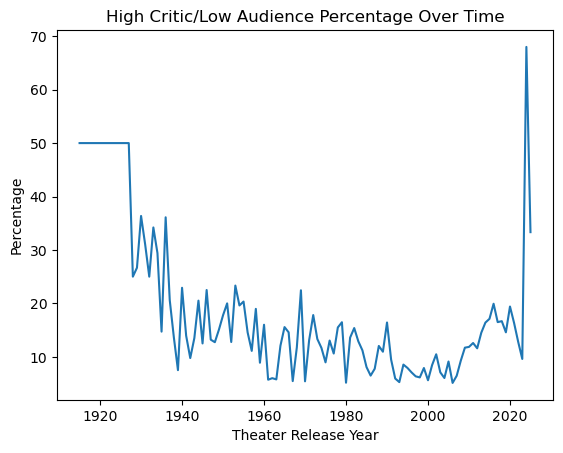

In [116]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_critic_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/Low Audience Percentage Over Time')

Text(0.5, 1.0, 'High Critic/Low Audience Percentage Over Time')

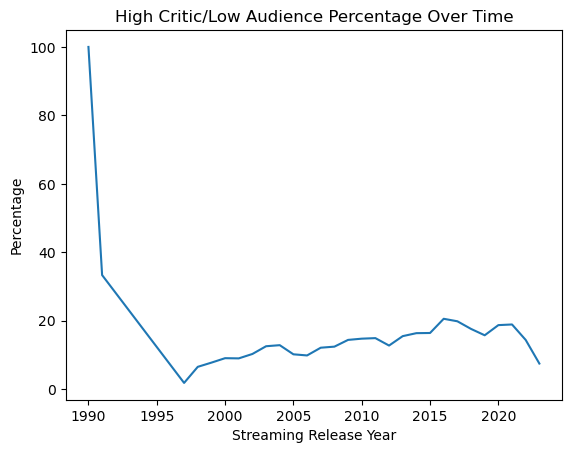

In [117]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_critic_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/Low Audience Percentage Over Time')

Text(0.5, 1.0, 'High Audience/Low Critic Percentage Over Time')

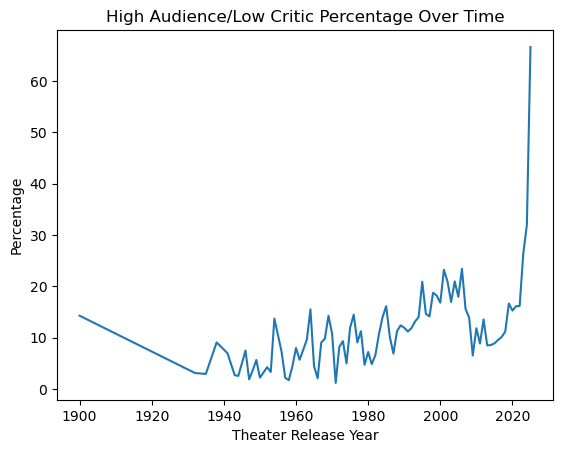

In [118]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_audience_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('High Audience/Low Critic Percentage Over Time')

Text(0.5, 1.0, 'High Audience/Low Critic Percentage Over Time')

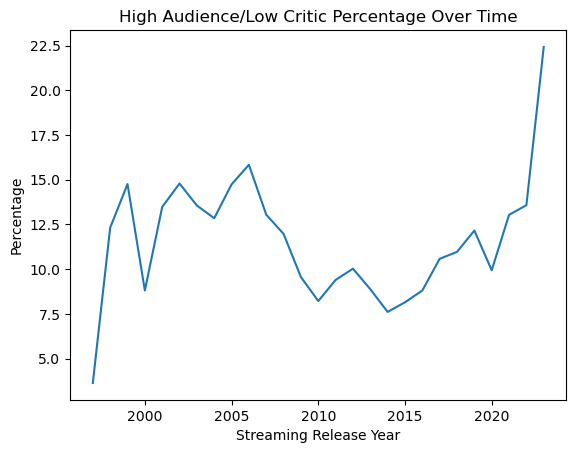

In [119]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_audience_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('High Audience/Low Critic Percentage Over Time')